libraries


In [1]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd



dataset

In [3]:
data = pd.read_csv("processed.hungarian.data")
print(data.head())

   28  1  2  130  132  0 2.1  185 0.1  0.2  ? ?.1 ?.2  0.3
0  29  1  2  120  243  0   0  160   0  0.0  ?   ?   ?    0
1  29  1  2  140    ?  0   0  170   0  0.0  ?   ?   ?    0
2  30  0  1  170  237  0   1  170   0  0.0  ?   ?   6    0
3  31  0  2  100  219  0   1  150   0  0.0  ?   ?   ?    0
4  32  0  2  105  198  0   0  165   0  0.0  ?   ?   ?    0


In [4]:
data = data.dropna()
print(data)

     28  1  2  130  132  0 2.1  185 0.1  0.2  ? ?.1 ?.2  0.3
0    29  1  2  120  243  0   0  160   0  0.0  ?   ?   ?    0
1    29  1  2  140    ?  0   0  170   0  0.0  ?   ?   ?    0
2    30  0  1  170  237  0   1  170   0  0.0  ?   ?   6    0
3    31  0  2  100  219  0   1  150   0  0.0  ?   ?   ?    0
4    32  0  2  105  198  0   0  165   0  0.0  ?   ?   ?    0
..   .. .. ..  ...  ... ..  ..  ...  ..  ... ..  ..  ..  ...
288  52  1  4  160  331  0   0   94   1  2.5  ?   ?   ?    1
289  54  0  3  130  294  0   1  100   1  0.0  2   ?   ?    1
290  56  1  4  155  342  1   0  150   1  3.0  2   ?   ?    1
291  58  0  2  180  393  0   0  110   1  1.0  2   ?   7    1
292  65  1  4  130  275  0   1  115   1  1.0  2   ?   ?    1

[293 rows x 14 columns]


In [5]:
print(isinstance(data, pd.DataFrame))

True


In [6]:
print(data.columns)

Index(['28', '1', '2', '130', '132', '0', '2.1', '185', '0.1', '0.2', '?',
       '?.1', '?.2', '0.3'],
      dtype='object')


In [7]:
print(data.head())

   28  1  2  130  132  0 2.1  185 0.1  0.2  ? ?.1 ?.2  0.3
0  29  1  2  120  243  0   0  160   0  0.0  ?   ?   ?    0
1  29  1  2  140    ?  0   0  170   0  0.0  ?   ?   ?    0
2  30  0  1  170  237  0   1  170   0  0.0  ?   ?   6    0
3  31  0  2  100  219  0   1  150   0  0.0  ?   ?   ?    0
4  32  0  2  105  198  0   0  165   0  0.0  ?   ?   ?    0


codes

In [8]:
data = pd.read_csv("processed.hungarian.data")
print(data.head())

   28  1  2  130  132  0 2.1  185 0.1  0.2  ? ?.1 ?.2  0.3
0  29  1  2  120  243  0   0  160   0  0.0  ?   ?   ?    0
1  29  1  2  140    ?  0   0  170   0  0.0  ?   ?   ?    0
2  30  0  1  170  237  0   1  170   0  0.0  ?   ?   6    0
3  31  0  2  100  219  0   1  150   0  0.0  ?   ?   ?    0
4  32  0  2  105  198  0   0  165   0  0.0  ?   ?   ?    0


In [9]:
data.columns =['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Num']
print(data.head())

   Age  Sex  Cp Trestbps Chol Fbs Restecg Thalach Exang  Oldpeak Slope Ca  \
0   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
1   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
2   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
3   31    0   2      100  219   0       1     150     0      0.0     ?  ?   
4   32    0   2      105  198   0       0     165     0      0.0     ?  ?   

  Thal  Num  
0    ?    0  
1    ?    0  
2    6    0  
3    ?    0  
4    ?    0  


EDA Exploratory  data analysis

In [10]:
#descriptive statistics
data.describe(include="all")

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
count,293.000000,293.000000,293.000000,293,293,293,293,293,293,293.000000,293,293,293,293.000000
unique,NaN,NaN,NaN,32,153,3,4,72,3,NaN,4,2,4,NaN
top,NaN,NaN,NaN,120,?,0,0,150,0,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,65,23,265,235,29,203,NaN,189,290,265,NaN
mean,47.894198,0.723549,2.986348,NaN,NaN,NaN,NaN,NaN,NaN,0.588055,NaN,NaN,NaN,0.361775
std,7.738385,0.448007,0.965049,NaN,NaN,NaN,NaN,NaN,NaN,0.909554,NaN,NaN,NaN,0.481336
min,29.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


In [11]:
#checking null values in dataframe
null_values = data.isnull()
print(null_values)

       Age    Sex     Cp  Trestbps   Chol    Fbs  Restecg  Thalach  Exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
288  False  False  False     False  False  False    False    False  False   
289  False  False  False     False  False  False    False    False  False   
290  False  False  False     False  False  False    False    False  False   
291  False  False  False     False  False  False    False    False  False   
292  False  False  False     False  False  False    False    False  False   

     Oldpeak  Slope     Ca   Thal    Num  
0      False  False  False  Fals

In [12]:
#null value
null_val = data.isnull().sum()
print(null_val)

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Num         0
dtype: int64


In [13]:
# we replace the ? with nun value with the mean of columns
data.replace('?', np.nan, inplace=True)
print(data.head())

   Age  Sex  Cp Trestbps Chol Fbs Restecg Thalach Exang  Oldpeak Slope   Ca  \
0   29    1   2      120  243   0       0     160     0      0.0   NaN  NaN   
1   29    1   2      140  NaN   0       0     170     0      0.0   NaN  NaN   
2   30    0   1      170  237   0       1     170     0      0.0   NaN  NaN   
3   31    0   2      100  219   0       1     150     0      0.0   NaN  NaN   
4   32    0   2      105  198   0       0     165     0      0.0   NaN  NaN   

  Thal  Num  
0  NaN    0  
1  NaN    0  
2    6    0  
3  NaN    0  
4  NaN    0  


In [14]:
#convert to numeric
data = data.apply(pd.to_numeric, errors='ignore')

#calculating mean of each raw
column_means=data.mean()

#fill nan values with mean
data.fillna(column_means, inplace=True)

#round the values to 1dp
data = data.round(0)
data = data.astype(int)
print(data.head())

   Age  Sex  Cp  Trestbps  Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  Slope  \
0   29    1   2       120   243    0        0      160      0        0      2   
1   29    1   2       140   251    0        0      170      0        0      2   
2   30    0   1       170   237    0        1      170      0        0      2   
3   31    0   2       100   219    0        1      150      0        0      2   
4   32    0   2       105   198    0        0      165      0        0      2   

   Ca  Thal  Num  
0   0     6    0  
1   0     6    0  
2   0     6    0  
3   0     6    0  
4   0     6    0  


In [15]:
#checking the datatype of the dataframe
data_type = data.dtypes
print(data_type)

Age         int32
Sex         int32
Cp          int32
Trestbps    int32
Chol        int32
Fbs         int32
Restecg     int32
Thalach     int32
Exang       int32
Oldpeak     int32
Slope       int32
Ca          int32
Thal        int32
Num         int32
dtype: object


In [16]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,29,1,2,120,243,0,0,160,0,0,2,0,6,0
1,29,1,2,140,251,0,0,170,0,0,2,0,6,0
2,30,0,1,170,237,0,1,170,0,0,2,0,6,0
3,31,0,2,100,219,0,1,150,0,0,2,0,6,0
4,32,0,2,105,198,0,0,165,0,0,2,0,6,0


In [17]:
#save my data to csv file
data.to_csv('data-reprocessed-hungarai.csv', encoding='utf-8')

count

In [18]:
dataframe = pd.read_csv("data-reprocessed-hungarai.csv")
dataframe.head()

,Unnamed: 0,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,0,29,1,2,120,243,0,0,160,0,0,2,0,6,0
1,1,29,1,2,140,251,0,0,170,0,0,2,0,6,0
2,2,30,0,1,170,237,0,1,170,0,0,2,0,6,0
3,3,31,0,2,100,219,0,1,150,0,0,2,0,6,0
4,4,32,0,2,105,198,0,0,165,0,0,2,0,6,0


In [19]:
print(isinstance(dataframe, pd.DataFrame))

True


Data Visualization

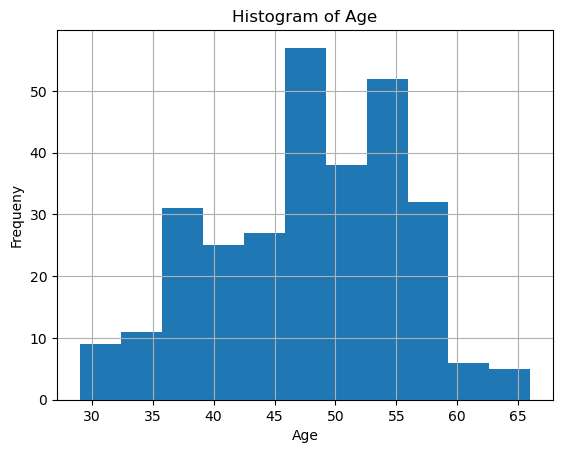

In [20]:
# data visualiation
column_name = "Age"
fig, ax = plt.subplots()

ax.hist(data[column_name], bins='auto')

ax.set_xlabel(column_name)
ax.set_ylabel('Frequeny')
ax.set_title("Histogram of " + column_name)
ax.grid(True)

plt.show()

BoxPlot

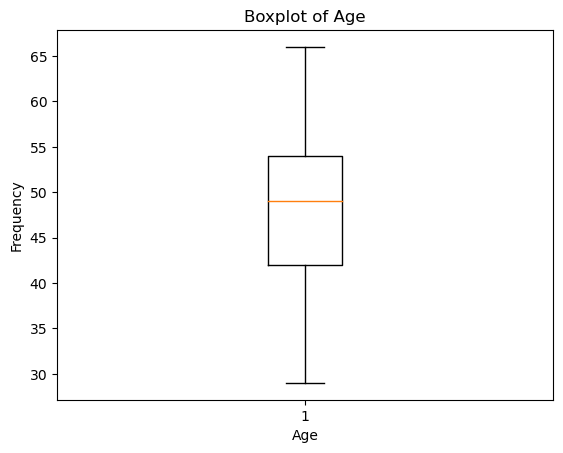

In [21]:
# data visualiation
column_name = "Age"
plt.boxplot(data[column_name])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Boxplot of " + column_name)


plt.show()

In [23]:
#separating the target
X = dataframe.iloc[:, -1]
y = dataframe.iloc[:, 14]
X

0      0
1      0
2      0
3      0
4      0
      ..
288    1
289    1
290    1
291    1
292    1
Name: Num, Length: 293, dtype: int64

Split data in train and test

In [24]:
#spliting data into training and testing
#X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Num', axis=1), data['Num'], test_size=0.2, random_state=42)

#printing
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (234, 13) (234,)
Testing set shape: (59, 13) (59,)


In [25]:
#checking if the train and test and are dataframes
print(isinstance(X_train, np.ndarray))
print(isinstance(y_train, np.ndarray))
print(isinstance(X_test, np.ndarray))
print(isinstance(y_test, np.ndarray))   

False
False
False
False


selecting a row using iloc

In [26]:
#selecting data using iloc
dataframe.iloc[:10, :10].values

array([[  0,  29,   1,   2, 120, 243,   0,   0, 160,   0],
       [  1,  29,   1,   2, 140, 251,   0,   0, 170,   0],
       [  2,  30,   0,   1, 170, 237,   0,   1, 170,   0],
       [  3,  31,   0,   2, 100, 219,   0,   1, 150,   0],
       [  4,  32,   0,   2, 105, 198,   0,   0, 165,   0],
       [  5,  32,   1,   2, 110, 225,   0,   0, 184,   0],
       [  6,  32,   1,   2, 125, 254,   0,   0, 155,   0],
       [  7,  33,   1,   3, 120, 298,   0,   0, 185,   0],
       [  8,  34,   0,   2, 130, 161,   0,   0, 190,   0],
       [  9,  34,   1,   2, 150, 214,   0,   1, 168,   0]], dtype=int64)

Feature Scaling

In [27]:
shaping = X_train.shape
shaping

(234, 13)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test


array([[-8.72426755e-02, -1.72223741e+00, -9.94708958e-01,
         4.21762993e-01,  3.93712586e-02, -2.61711961e-01,
        -4.55196471e-01, -1.90166530e-01, -6.53321719e-01,
         4.54338782e-01, -5.70188296e+00,  0.00000000e+00,
         8.33101948e-02],
       [ 5.62909747e-01,  5.80640041e-01,  1.07428567e+00,
        -1.14656342e+00,  1.28633676e+00, -2.61711961e-01,
         1.81110085e+00, -1.84930587e+00,  1.53063946e+00,
         4.54338782e-01,  1.24495261e-01,  0.00000000e+00,
         8.33101948e-02],
       [-8.67425582e-01, -1.72223741e+00, -9.94708958e-01,
        -4.18411869e-01, -1.03155205e+00, -2.61711961e-01,
        -4.55196471e-01,  1.72422502e+00, -6.53321719e-01,
        -6.41694981e-01,  1.24495261e-01,  0.00000000e+00,
         8.33101948e-02],
       [ 1.34309265e+00,  5.80640041e-01,  1.07428567e+00,
         1.41704706e-01, -4.74085123e-01, -2.61711961e-01,
        -4.55196471e-01, -1.67913774e+00, -6.53321719e-01,
        -6.41694981e-01,  1.24495261e

Training and Prediction

In [29]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifier.predict(X_test)
y_pred 

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [31]:
y_test

84     0
260    1
45     0
176    0
143    0
125    0
227    1
118    0
9      0
90     0
147    0
275    1
33     0
281    1
221    1
77     0
46     0
5      0
231    1
244    1
124    0
238    1
279    1
101    0
75     0
271    1
274    1
109    0
60     0
202    1
42     0
56     0
285    1
117    0
59     0
165    0
282    1
113    0
159    0
63     0
146    0
66     0
269    1
158    0
181    0
30     0
22     0
24     0
277    1
119    0
246    1
79     0
17     0
172    0
213    1
177    0
183    0
168    0
6      0
Name: Num, dtype: int32

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  5]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.74      0.78      0.76        18

    accuracy                           0.85        59
   macro avg       0.82      0.83      0.82        59
weighted avg       0.85      0.85      0.85        59



making predictions